# Prices

##  What are the typical prices for airbnb properties ?

### Gather Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

In [3]:
#Loading the data
# Picked up from http://insideairbnb.com/get-the-data/

#df = pd.read_csv('Florence/listings_Sample.csv')
df = pd.read_csv('Florence/listings_Full.csv')

### Cleaning Data

In [4]:
#We remove the dollar sign as first character, remove thousands comma separator and convert to float.

df['price_clean'] = df['price'].str[1:].str.replace(",","").astype(float)

df['price_clean']

0         104.0
1         195.0
2          80.0
3         110.0
4          70.0
          ...  
10743     560.0
10744     218.0
10745      86.0
10746    3814.0
10747     120.0
Name: price_clean, Length: 10748, dtype: float64

In [16]:
# We now need to clean outliers
# In this case we decided to removea the values above 90th percentile and below 10th percentile

df_out_clean = df[df['price_clean'] <= df['price_clean'].quantile(.9)]
df_out_clean = df_out_clean[df_out_clean['price_clean'] >= df_out_clean['price_clean'].quantile(.1)]

### Analyze & Visualize Data

count    8762.000000
mean      126.358252
std        66.918249
min        45.000000
25%        75.000000
50%       106.000000
75%       160.000000
max       325.000000
Name: price_clean, dtype: float64


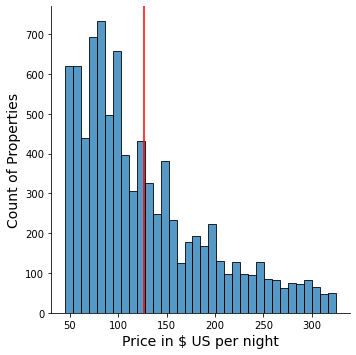

: 

In [20]:
# We can now lookg at Prices Statistics

print(df_out_clean['price_clean'].describe())


# And now we plot the prices to visualize the mean an the distribution

sns.displot(data=df_out_clean, x="price_clean")
plt.xlabel("Price in $ US per night", size=14)
plt.ylabel("Count of Properties", size=14)
plt.axvline(x=df_out_clean.price_clean.mean(),
            color='red')

### Conclusion

Ranging from 45 US$ to 325 US$ a night (outliers cleaned), Florence gives a mean price per night of 125 US$ (~130€).

That leaves us with interested findings already, the average property on Airbnb in Florence will bring about 11'125 US$ yearly (11'570€)